C:\Users\Thirukumaran\AppData\Local\Temp\ipykernel_2632\1075072469.py:16: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.


Total Features :  215
[0 1] ['B' 'S']
Total missing values :  5
Accuracy: 0.9900232790156301


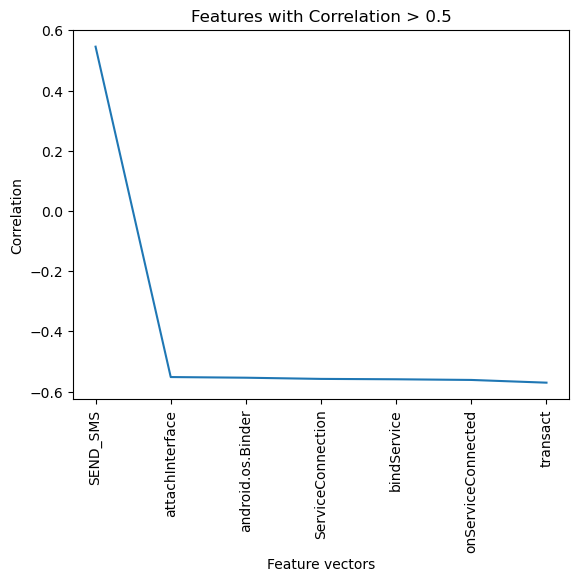

2023-03-30 11:50:49.831 
  command:

    streamlit run c:\Users\Thirukumaran\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
from sklearn.tree import export_graphviz
from IPython.display import Image
from tensorflow import keras
import numpy as np
from sklearn import tree
import dtreeviz
import streamlit as st
from matplotlib import pyplot as plt
df2 = pd.read_csv("drebin215dataset5560malware9476benign.csv")
print("Total Features : ",len(df2.columns)-1)


classes,count = np.unique(df2['class'],return_counts=True)
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
df2 = df2.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
df2=df2.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df2.isna().sum())))
df2.dropna(inplace=True)
for c in df2.columns:
    df2[c] = pd.to_numeric(df2[c])
df2

train_x,test_x,train_y,test_y = train_test_split(df2[df2.columns[:len(df2.columns)-1]].to_numpy(),df2[df2.columns[-1]].to_numpy(),test_size = 0.2,shuffle=True)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
df2.describe()
classes,count = np.unique(df2.corr()['class'],return_counts=True)



df2.corr()

data_num_corr = df2.corr()['class'][:-1]
golden_features_list_1 = data_num_corr[abs(data_num_corr) > 0.5].sort_values(ascending=False)
golden_features_list_1

plt.plot(golden_features_list_1.index, golden_features_list_1.values)
plt.title('Features with Correlation > 0.5')
plt.xlabel('Feature vectors')
plt.xticks(rotation='vertical')
plt.ylabel('Correlation')
plt.show()
st.subheader('Raw data')
st.write(df2)
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(clf.estimators_[0], filled=True)